<a href="https://colab.research.google.com/github/Shravinya/Deep-Learning/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. Load and Preprocess the Dataset


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (since we are using Dense layers)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

2. Build and Train the Baseline Model



In [ ]:
def build_baseline_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',s
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8377 - loss: 0.5266 - val_accuracy: 0.9567 - val_loss: 0.1384
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9702 - loss: 0.0979 - val_accuracy: 0.9704 - val_loss: 0.0914
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9802 - loss: 0.0634 - val_accuracy: 0.9714 - val_loss: 0.0919
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9862 - loss: 0.0428 - val_accuracy: 0.9700 - val_loss: 0.0962
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9884 - loss: 0.0336 - val_accuracy: 0.9825 - val_loss: 0.0631
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9806 - val_loss: 0.0690
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9785 - val_loss: 0.0794
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9933 - loss: 0.0209 - val_

3. Build and Train the Model with L1 Regularization

In [ ]:
def build_l1_regularized_model(l1=0.01):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,),
                     kernel_regularizer=regularizers.l1(l1)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(l1)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(l1)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the L1-regularized model
l1_model = build_l1_regularized_model(l1=0.01)
history_l1 = l1_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.1276 - loss: 51.3612 - val_accuracy: 0.1135 - val_loss: 3.0173
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.1128 - loss: 3.0162 - val_accuracy: 0.1135 - val_loss: 3.0150
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1139 - loss: 3.0159 - val_accuracy: 0.1135 - val_loss: 3.0114
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1141 - loss: 3.0158 - val_accuracy: 0.1135 - val_loss: 3.0143
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.1119 - loss: 3.0164 - val_accuracy: 0.1135 - val_loss: 3.0164
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1128 - loss: 3.0164 - val_accuracy: 0.1135 - val_loss: 3.0202
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1113 - loss: 3.0163 - val_accuracy: 0.1135 - val_loss: 3.0177
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.1112 - loss: 3.0163 - val

4. Build and Train the Model with L2 Regularization

In [ ]:
def build_l2_regularized_model(l2=0.01):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,),
                     kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the L2-regularized model
l2_model = build_l2_regularized_model(l2=0.01)
history_l2 = l2_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7927 - loss: 4.4869 - val_accuracy: 0.9066 - val_loss: 1.0508
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9168 - loss: 0.9791 - val_accuracy: 0.9254 - val_loss: 0.8155
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9294 - loss: 0.7952 - val_accuracy: 0.9344 - val_loss: 0.7204
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9338 - loss: 0.7174 - val_accuracy: 0.9430 - val_loss: 0.6572
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9399 - loss: 0.6620 - val_accuracy: 0.9396 - val_loss: 0.6414
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9422 - loss: 0.6369 - val_accuracy: 0.9391 - val_loss: 0.6297
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9441 - loss: 0.6130 - val_accuracy: 0.9482 - val_loss: 0.5816
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9464 - loss: 0.5874 - va

5. Build and Train the Model with Both L1 and L2 Regularization

In [ ]:
def build_l1_l2_regularized_model(l1=0.01, l2=0.01):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,),
                     kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the L1 + L2 regularized model
l1_l2_model = build_l1_l2_regularized_model(l1=0.01, l2=0.01)
history_l1_l2 = l1_l2_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.1182 - loss: 53.8829 - val_accuracy: 0.1135 - val_loss: 3.0189
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.1124 - loss: 3.0119 - val_accuracy: 0.1135 - val_loss: 2.9998
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.1124 - loss: 3.0003 - val_accuracy: 0.1135 - val_loss: 3.0052
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.1145 - loss: 3.0049 - val_accuracy: 0.1135 - val_loss: 3.0051
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1129 - loss: 3.0111 - val_accuracy: 0.1135 - val_loss: 3.0228
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1114 - loss: 3.0251 - val_accuracy: 0.1135 - val_loss: 3.0280
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.1121 - loss: 3.0260 - val_accuracy: 0.1135 - val_loss: 3.0289
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1110 - loss: 3.0267 - 

6. Experiment with Different Regularization Strengths

In [ ]:
# Experimenting with different values
l1_model = build_l1_regularized_model(l1=0.1)
history_l1 = l1_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

l2_model = build_l2_regularized_model(l2=0.1)
history_l2 = l2_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

l1_l2_model = build_l1_l2_regularized_model(l1=0.1, l2=0.1)
history_l1_l2 = l1_l2_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.1236 - loss: 492.0521 - val_accuracy: 0.1135 - val_loss: 9.4645
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.1111 - loss: 9.4500 - val_accuracy: 0.1135 - val_loss: 9.4219
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.1122 - loss: 9.4501 - val_accuracy: 0.1135 - val_loss: 9.3969
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1109 - loss: 9.4495 - val_accuracy: 0.1135 - val_loss: 9.4166
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.1118 - loss: 9.4501 - val_accuracy: 0.1135 - val_loss: 9.4763
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.1130 - loss: 9.4521 - val_accuracy: 0.1135 - val_loss: 9.5369
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.1100 - loss: 9.4514 - val_accuracy: 0.1135 - val_loss: 9.4955
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1140 - loss: 9.4488 -



1. Build and Train the Model with Dropout

In [ ]:
def build_dropout_model(dropout_rate=0.2):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,)),
        layers.Dropout(dropout_rate),  # Dropout layer
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model with Dropout (0.2 rate)
dropout_model = build_dropout_model(dropout_rate=0.2)
history_dropout = dropout_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.7021 - loss: 0.8994 - val_accuracy: 0.9554 - val_loss: 0.1661
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9521 - loss: 0.1904 - val_accuracy: 0.9688 - val_loss: 0.1178
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9651 - loss: 0.1347 - val_accuracy: 0.9758 - val_loss: 0.0945
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9738 - loss: 0.1070 - val_accuracy: 0.9768 - val_loss: 0.0907
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9761 - loss: 0.0923 - val_accuracy: 0.9789 - val_loss: 0.0873
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9791 - loss: 0.0812 - val_accuracy: 0.9783 - val_loss: 0.0906
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9824 - loss: 0.0708 - val_accuracy: 0.9809 - val_loss: 0.0773
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9842 - loss: 0.0609 - v

2. Experiment with Different Dropout Rates

In [ ]:
# Experiment with 0.5 dropout rate
dropout_model_05 = build_dropout_model(dropout_rate=0.5)
history_dropout_05 = dropout_model_05.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.2735 - loss: 1.9410 - val_accuracy: 0.8570 - val_loss: 0.5506
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7540 - loss: 0.7670 - val_accuracy: 0.9200 - val_loss: 0.3264
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8545 - loss: 0.5307 - val_accuracy: 0.9466 - val_loss: 0.2148
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8962 - loss: 0.4112 - val_accuracy: 0.9596 - val_loss: 0.1759
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9098 - loss: 0.3560 - val_accuracy: 0.9660 - val_loss: 0.1494
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9225 - loss: 0.3204 - val_accuracy: 0.9670 - val_loss: 0.1564
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9309 - loss: 0.2876 - val_accuracy: 0.9699 - val_loss: 0.1509
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9338 - loss: 0.2711 - va

3. Combining Dropout with L1/L2 Regularization

In [ ]:
def build_dropout_regularized_model(l1=0.01, l2=0.01, dropout_rate=0.2):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,),
                     kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model with Dropout + L1/L2 Regularization
dropout_l1_l2_model = build_dropout_regularized_model(l1=0.01, l2=0.01, dropout_rate=0.2)
history_dropout_l1_l2 = dropout_l1_l2_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

# Print Observations
print(f"Total Epochs Run: {len(history_dropout_l1_l2.history['loss'])}")
print(f"Final Validation Loss: {min(history_dropout_l1_l2.history['val_loss']):.4f}")
print(f"Final Validation Accuracy: {max(history_dropout_l1_l2.history['val_accuracy']):.4f}")


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.1112 - loss: 54.0195 - val_accuracy: 0.1135 - val_loss: 3.0167
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1136 - loss: 3.0114 - val_accuracy: 0.1135 - val_loss: 2.9992
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.1123 - loss: 3.0005 - val_accuracy: 0.1135 - val_loss: 3.0047
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.1126 - loss: 3.0046 - val_accuracy: 0.1135 - val_loss: 3.0044
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.1123 - loss: 3.0111 - val_accuracy: 0.1135 - val_loss: 3.0218
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.1122 - loss: 3.0250 - val_accuracy: 0.1135 - val_loss: 3.0278
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.1128 - loss: 3.0260 - val_accuracy: 0.1135 - val_loss: 3.0277
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.1129 - loss: 3.0266 -

Model with Early Stopping (Patience = 2)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping with patience=2
early_stopping_2 = EarlyStopping(monitor='val_loss', patience=2, min_delta=0.001, restore_best_weights=True)

# Train model with early stopping (patience=2)
early_stopping_model_2 = build_baseline_model()
history_es_2 = early_stopping_model_2.fit(
    x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128, callbacks=[early_stopping_2]
)

# Print results
print("\nWith Early Stopping (Patience = 2):")
print(f"Total Epochs Run: {len(history_es_2.history['loss'])}")
print(f"Final Validation Loss: {history_es_2.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_es_2.history['val_accuracy'][-1]:.4f}")



Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8414 - loss: 0.5224 - val_accuracy: 0.9637 - val_loss: 0.1184
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9705 - loss: 0.0975 - val_accuracy: 0.9721 - val_loss: 0.0865
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9810 - loss: 0.0619 - val_accuracy: 0.9737 - val_loss: 0.0820
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9867 - loss: 0.0439 - val_accuracy: 0.9769 - val_loss: 0.0879
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9884 - loss: 0.0343 - val_accuracy: 0.9785 - val_loss: 0.0761
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9797 - val_loss: 0.0766
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9787 - val_loss: 0.0805

With Early Stopping (Patience = 2):
Total Epochs Run: 7
Final Validation Loss: 0.0805
Final V

Train Model with Early Stopping (Patience = 5)

In [ ]:
# Define Early Stopping with patience=5
early_stopping_5 = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

# Train model with early stopping (patience=5)
early_stopping_model_5 = build_baseline_model()
history_es_5 = early_stopping_model_5.fit(
    x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128, callbacks=[early_stopping_5]
)

# Print results
print("\nWith Early Stopping (Patience = 5):")
print(f"Total Epochs Run: {len(history_es_5.history['loss'])}")
print(f"Final Validation Loss: {history_es_5.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_es_5.history['val_accuracy'][-1]:.4f}")


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8273 - loss: 0.5504 - val_accuracy: 0.9566 - val_loss: 0.1452
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9698 - loss: 0.0991 - val_accuracy: 0.9733 - val_loss: 0.0827
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9790 - val_loss: 0.0690
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9665 - val_loss: 0.1186
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9889 - loss: 0.0330 - val_accuracy: 0.9781 - val_loss: 0.0773
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9805 - val_loss: 0.0701
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9804 - val_loss: 0.0708
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9926 - loss: 0.0234 - val

Expected Insights from Output
Without Early Stopping → The model runs for all 20 epochs, but may overfit.
Patience = 2 → Stops early, possibly preventing overfitting but may not fully optimize.
Patience = 5 → Balances between stopping early and achieving a good performance.

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift width by up to 10% of the image
    height_shift_range=0.1, # Shift height by up to 10% of the image
    zoom_range=0.1,         # Zoom in/out by up to 10%
    shear_range=0.1         # Apply shearing transformations
)

# Fit the generator to training data
datagen.fit(x_train.reshape(-1, 28, 28, 1))  # Reshape to 4D tensor for augmentation


def build_augmented_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

augmented_model = build_augmented_model()

# Flatten images before feeding into the model
def flatten_generator(generator):
    for batch_x, batch_y in generator:
        yield batch_x.reshape(batch_x.shape[0], 28*28), batch_y  # Flatten images

# Train using augmented data (now correctly flattened)
history_augmented = augmented_model.fit(
    flatten_generator(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=128)),
    epochs=20,
    steps_per_epoch=len(x_train) // 128,
    validation_data=(x_test.reshape(-1, 28*28), y_test)
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.7049 - loss: 0.8831 - val_accuracy: 0.9589 - val_loss: 0.1284
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9351 - loss: 0.2111 - val_accuracy: 0.9708 - val_loss: 0.0892
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.9508 - loss: 0.1578 - val_accuracy: 0.9703 - val_loss: 0.0955
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9580 - loss: 0.1389 - val_accuracy: 0.9772 - val_loss: 0.0708
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9635 - loss: 0.1194 - val_accuracy: 0.9813 - val_loss: 0.0612
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9655 - loss: 0.1079 - val_accuracy: 0.9832 - val_loss: 0.0536
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9681 - loss: 0.1021 - val_accuracy: 0.9829 - val_loss: 0.0537
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9710 - loss: 0.0927 - 

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - accuracy: 0.4319 - loss: 4.8447 - val_accuracy: 0.8606 - val_loss: 1.1576
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.7686 - loss: 1.4257 - val_accuracy: 0.9183 - val_loss: 0.9918
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8174 - loss: 1.2827 - val_accuracy: 0.9343 - val_loss: 0.9440
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8338 - loss: 1.2184 - val_accuracy: 0.9466 - val_loss: 0.8546
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.8410 - loss: 1.1727 - val_accuracy: 0.9389 - val_loss: 0.8485
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8491 - loss: 1.1384 - val_accuracy: 0.9455 - val_loss: 0.8364
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.8472 - loss: 1.1236 - val_accuracy: 0.9379 - val_loss: 0.8161
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.8502 - loss: 1.0989 - 

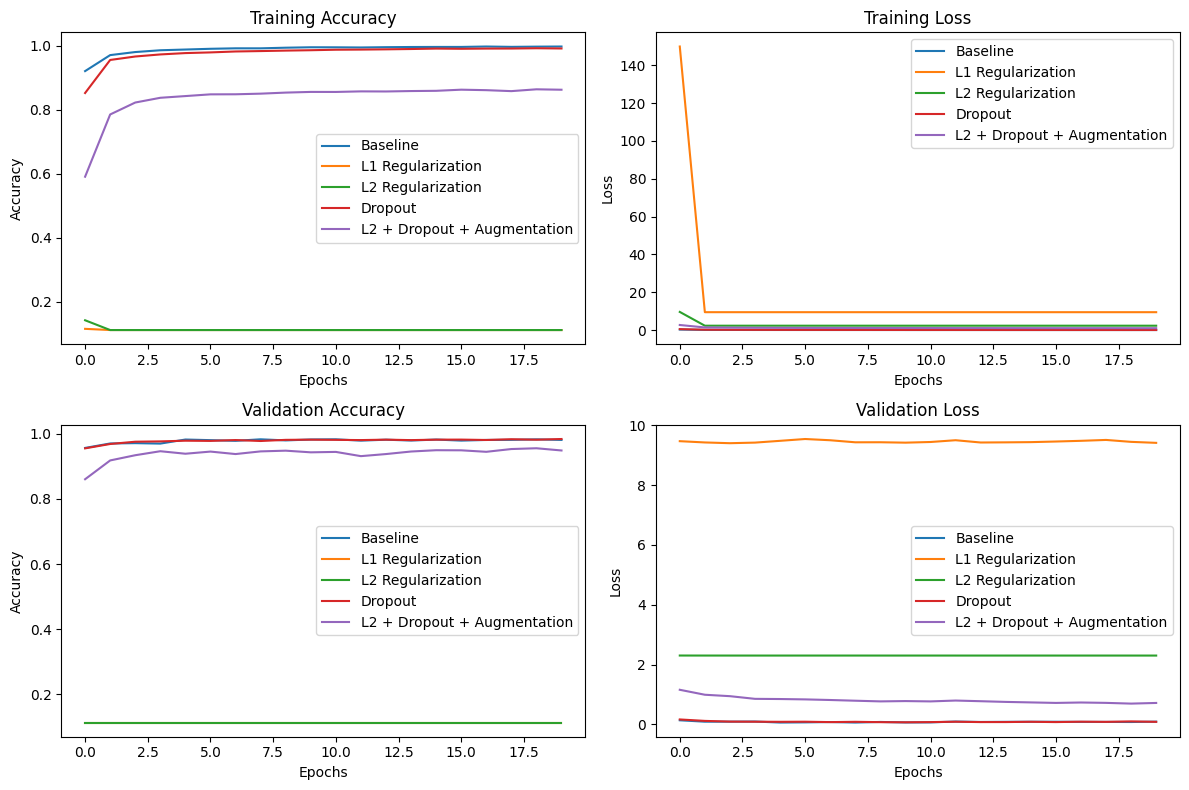

313/313 - 1s - 4ms/step - accuracy: 0.9489 - loss: 0.7175
Test Loss: 0.7175
Test Accuracy: 0.9489


In [ ]:
# Combine L2 Regularization, Dropout, and Data Augmentation

# Define the combined regularization model with L2 + Dropout
def build_combined_regularized_model(l2=0.01, dropout_rate=0.2):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28*28,), kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout_rate),  # Dropout layer
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model with L2 + Dropout regularization
combined_model = build_combined_regularized_model(l2=0.01, dropout_rate=0.2)
history_combined = combined_model.fit(
    flatten_generator(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=128)),
    epochs=20,
    steps_per_epoch=len(x_train) // 128,
    validation_data=(x_test.reshape(-1, 28*28), y_test)
)

# Evaluate and compare the results
def plot_history(history_baseline, history_l1, history_l2, history_dropout, history_combined):
    plt.figure(figsize=(12, 8))

    # Plot training and validation accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history_baseline.history['accuracy'], label='Baseline')
    plt.plot(history_l1.history['accuracy'], label='L1 Regularization')
    plt.plot(history_l2.history['accuracy'], label='L2 Regularization')
    plt.plot(history_dropout.history['accuracy'], label='Dropout')
    plt.plot(history_combined.history['accuracy'], label='L2 + Dropout + Augmentation')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(2, 2, 2)
    plt.plot(history_baseline.history['loss'], label='Baseline')
    plt.plot(history_l1.history['loss'], label='L1 Regularization')
    plt.plot(history_l2.history['loss'], label='L2 Regularization')
    plt.plot(history_dropout.history['loss'], label='Dropout')
    plt.plot(history_combined.history['loss'], label='L2 + Dropout + Augmentation')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(2, 2, 3)
    plt.plot(history_baseline.history['val_accuracy'], label='Baseline')
    plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization')
    plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
    plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
    plt.plot(history_combined.history['val_accuracy'], label='L2 + Dropout + Augmentation')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot validation loss
    plt.subplot(2, 2, 4)
    plt.plot(history_baseline.history['val_loss'], label='Baseline')
    plt.plot(history_l1.history['val_loss'], label='L1 Regularization')
    plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
    plt.plot(history_dropout.history['val_loss'], label='Dropout')
    plt.plot(history_combined.history['val_loss'], label='L2 + Dropout + Augmentation')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot and compare the results
plot_history(history_baseline, history_l1, history_l2, history_dropout, history_combined)

# Evaluate the combined model on the test set
test_loss, test_accuracy = combined_model.evaluate(x_test.reshape(-1, 28*28), y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
